# surface lenght

In [11]:
import skfmm
from scipy.ndimage import distance_transform_edt
from scipy.signal import convolve2d
from main import *

from glob import glob

import seaborn as sns

import pandas as pd

from tqdm import tqdm

import os
import string

from scipy.ndimage import median_filter

In [12]:
folder = 'sulov_folder'
files = glob(folder + '/BIN-*points.tif')
files

names = [os.path.basename(f)[:-11] for f in files]
names

n_brain = len(names)
print(n_brain)

4


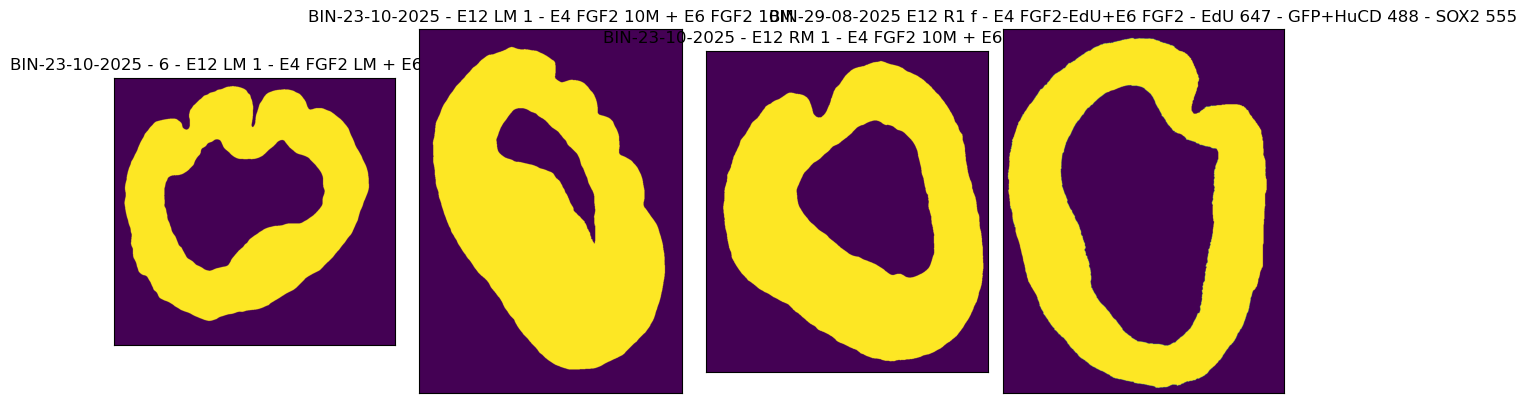

In [13]:
fig, axs = plt.subplots(1, n_brain, figsize = (3*n_brain,4))

for i, name in enumerate(names):

    donut, res = get_picture2D(f'{folder}/{name}.tif')

    axs[i].set_title(name)
    axs[i].imshow(donut)


for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()


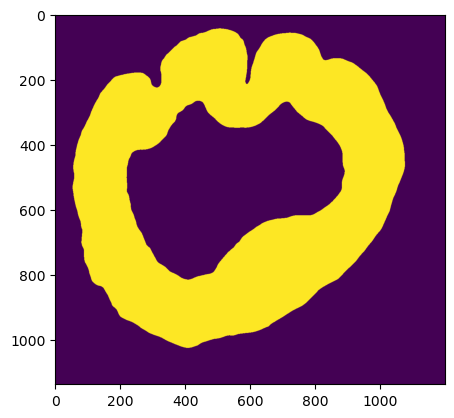

In [14]:
donut, res = get_picture2D(f'{folder}/{names[0]}.tif')

plt.imshow(donut)

donut = np.pad(donut, pad_width=10, mode='constant', constant_values=0)

plt.imshow(donut)


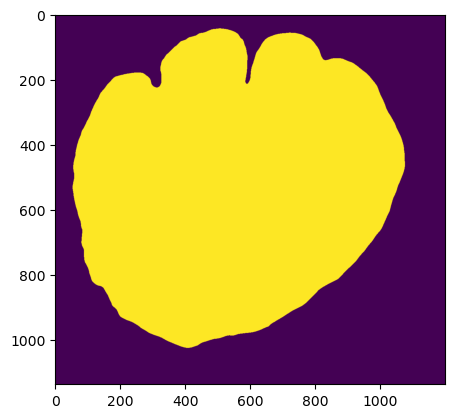

In [15]:
# donut = smoothing(donut, 10)
donut = median_filter(donut, size=5, mode='reflect')

donut_mask = donut != 0

# we should have only ventricle and outside regions
labeled, n = label(~ donut_mask)

if n != 2:
    raise ValueError('problem with masks, too many regions')

# outside label is the label of the pixel on the top left
outside_label = labeled[(0,0)]
outside_mask = labeled == outside_label
# ventricle is the other region
ventr_mask = (labeled != outside_label) & (~ donut_mask)

tissue = ~outside_mask


plt.imshow(tissue)

In [16]:
len_edge(tissue, res=res)

1193.07211707828

In [17]:
points = np.column_stack(np.nonzero(tissue))

hull = ConvexHull(points)

hull_coords = points[hull.vertices]

yy, xx = np.mgrid[0:tissue.shape[0], 0:tissue.shape[1]]
coords = np.column_stack((yy.ravel(), xx.ravel()))

path = Path(hull_coords)
inside = path.contains_points(coords)
hull_mask = inside.reshape(tissue.shape)

len_edge(hull_mask, res=res)

1067.9263798882873

In [18]:
len_surf = len_edge(tissue, res=res)
len_hull = len_edge(hull_mask, res=res)

surface = 1193.1 --- convex = 1067.9
GI = 1.117


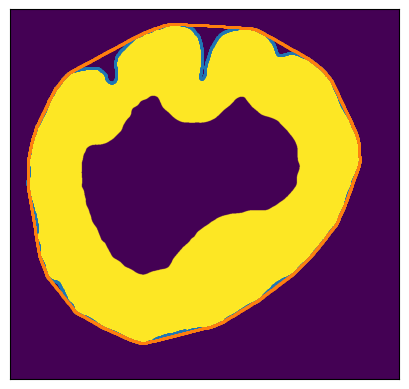

In [19]:
print(f'surface = {len_surf:.1f} --- convex = {len_hull:.1f}')
print(f'GI = {len_surf/len_hull:.3f}')

plt.imshow(donut)

plt.scatter(*get_edge_coords(tissue)[::-1], s=1)
plt.scatter(*get_edge_coords(hull_mask)[::-1], s=1)

plt.xticks([]);
plt.yticks([]);

In [20]:
gyr_index(donut)

smoothing factor = 10.00


(1.0789911728465116, 3566.234990397785, 3305.156779911015)

In [21]:
gyr_index(donut)

smoothing factor = 10.00


(1.0789911728465116, 3566.234990397785, 3305.156779911015)

In [22]:
letters = list(string.ascii_uppercase)

In [ ]:
for i in range(n_brain):
    print(letters[i])
    donut, res = get_picture2D(f'{folder}/{names[i]}.tif')

    res = tuple(r*16 for r in res)

    print(gyr_index(donut, res=res))

A
smoothing factor = 10.00
(1.078991172846531, 1150.110856285224, 1065.9131281408627)
B
smoothing factor = 10.00
(1.016810580456459, 952.0129852571673, 936.2736812099229)
C
smoothing factor = 10.00
(1.0375587629255592, 1082.2728840281377, 1043.0955071657822)
D
smoothing factor = 10.00
(1.0450605629295664, 19902.577973589963, 19044.425442481588)
